## Task: Classify images 0 or 1

### Description



* Input: 28x28 (batched) arrays of pixel data
* pixel data: 0-255 (intensity)
* Output: 0 or 1 for each image in batch
* Goal: best accuracy (% correctly identified)

### Tools

#### matplotlib
* information-visualization sweet

In [2]:
import matplotlib.pyplot as plt # "plt" is a standard alias

#### numpy
* used for handling mutli-dimensional arrays
* ~100x more efficient than pure python

In [1]:
import numpy as np # "np" is a standard alias

#### pandas
* useful for import/export of data

In [5]:
import pandas as pd # "pd" is a standard alias

### Data

#### Overview

* We have at our disposal a dataset with sample images and labels indicating if they are a 1 or 0
* We can use this data to test the accuracy of our model
* When our model is truly evaluated, it will be evaluated against a dataset we have never seen before.

#### Import

In [7]:
data_file_name = 'archive/mnist_train.csv'

image_data_frame = pd.read_csv(data_file_name)
image_data_frame

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Filtering and "Shaping"

In [8]:
labels = [0,1]
image_and_label_data = image_data_frame[image_data_frame.label.isin(labels)].to_numpy()
image_data = image_and_label_data[:,1:].reshape((-1,28,28))
label_data = image_and_label_data[:,0].reshape((-1))

## Implementation

I'm curious about the data.  Let's look at it.

### Data Visualization

#### Most straightforward way of viewing an image from the dataset

In [ ]:
# Look at the first image
plt.imshow(image_data[0])

#### More sophisticated way of viewing images in dataset...

In [18]:
def show_images(image_data, columns=3, rows=None, titles=None):
    rows = rows or image_data.shape[0] // columns
    titles = titles or list(range(rows*columns))
    fig, axes = plt.subplots(rows, columns)

    for image_datum,ax,i in zip(image_data, axes.flat, range(rows*columns)):
        ax.imshow(image_datum)
        ax.set_title(titles[i])
    fig.tight_layout()
    return fig, axes


In [28]:
rng = np.random.default_rng()

def show_random_sample(titles=None):
    n = 9
    index = rng.integers(0, image_data.shape[0], n)
    _titles = [f'i:{index[i]}, l:{label_data[index[i]]}' for i in range(n)]
    show_images(image_data[index], rows=3, titles=titles or _titles)

#### Random Sample of images

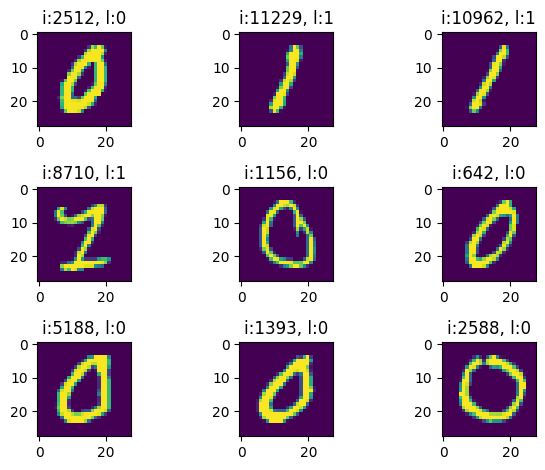

In [29]:
show_random_sample()

* How can we tell apart 0s and 1s?